
<div>
    <div style="background-color : pink">
    <h1 style="margin: auto; padding: 30px;color: #fff">
            Projet 10 - Détecter des faux billets  
        </h1>
    </div> 
    

<div>
    <div style="background-color : fff">
    <h1 style="text-align: center; padding: 30px;color: pink">
            Régression Logistique sans données centrées réduites 
        </h1>
    </div> 

<div>
    <h3 style="margin: auto; padding: 10px; color: pink;margin-left: 4.5em; text-indent: -4.5em">Ce programme est organisé en plusieurs partie :
        </h3>
        <div style="margin: auto;padding-left: 40px;padding-bottom: 20px;margin-left: 4.5em; text-indent: -4.5em">
            <lu>
                <li><a href="#partie1">Partie 1</a> : Librairies et fonction</li>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
                <li><a href="#partie2">Partie 2</a> : Importation et visualisation des données </li>
                <li><i> 2.1 - Importation du DataFrame</i></li>
                <li><i> 2.2 - Initialisation du DataFrame</i></li>
                <li><a href="#partie3">Partie 3</a> : Régression Logistique avec la librairie Statsmodels</li>
                <li><a href="#partie4">Partie 4</a> : Régression Logistique avec la librairie Sklearn</li>
                <li><i> 4.1 - Train Test Split</i></li>
                <li><i> 4.2 - Matrice de confusion</i></li>
                <li><i> 4.3 - Test d'accuracy</i></li>
                <li><a href="#partie5">Partie 5</a> : Courbe ROC</li>
                <li><a href="#Sauvegarde">Sauvegarde</a></li>
                <li><a href="#Conclusion">Conclusion</a></li>
        </lu>
        </div>
    </div>
</div>



---
## <font color=pink> Lexique des données </font>

<font> - Dimensions exprimées en mm </font>
 
* is_genuine : Indique si le billet est vrai (True) ou faux (False)
* diagonal : la diagonale du billet 
* height_left : la hauteur côté gauche du billet 
* height_right : La hauteur côté droit du billet 
* margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci 
* margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci
* length : la longueur du billet 

---
<div>
    <div style="background-color: pink;" id="partie1">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 1 - Librairies et fonctions
        </h2>
        <lu>
                <li><i> 1.1 - Importation des librairies</i></li>
                <li><i> 1.2 - Définition d'une fonction</i></li>
            <lu>
                <div>
                    <div>
                        <div>                                                                   

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.1 - Importation des librairies 
        </h3>
    </div>

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            1.2 - Déclaration d'une fonction et importation du dataFrame 
        </h3>
    </div>

In [2]:
# Définition de la fonction "analyseDataFrame"
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())
    

---
<div>
    <div style="background-color: pink;" id="partie2">
        <h2 style="margin: auto; padding: 20px; color: #fff; margin-left: 4.5em; text-indent: -4.5em">
            Partie 2 - Importation et visualisation des données
        </h2>
        <lu>
                <li><i> 2.1 - Importation du DataFrame</i></li>
                <li><i> 2.2 - Initialisation du DataFrame</i></li>
            <lu>
                <div>
                    <div>
                        <div> 

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            2.1 - Importation du DataFrame 
        </h3>
    </div>

In [3]:
# importation du dataFrame
Df_billets = pd.read_csv("Df_billets_final.csv", sep=";")

# visualisation du dataFrame
analyseDataFrame(Df_billets) 


La dimension de DataFrame « Df_billets » : (1500, 8) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1500 non-null   int64  
 1   is_genuine    1500 non-null   bool   
 2   diagonal      1500 non-null   float64
 3   height_left   1500 non-null   float64
 4   height_right  1500 non-null   float64
 5   margin_low    1500 non-null   float64
 6   margin_up     1500 non-null   float64
 7   length        1500 non-null   float64
dtypes: bool(1), float64(6), int64(1)
memory usage: 83.6 KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1500.0,749.500000,433.157015,0.00,374.75,749.50,1124.25,1499.00
diagonal,1500.0,171.958440,0.305195,171.04,171.75,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.82,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.71,103.92,104.15,104.95
margin_low,1500.0,4.483475,0.659632,2.98,4.02,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.99,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.03,112.96,113.34,114.44


,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,4,True,171.73,104.28,103.46,4.04,3.48,112.54


Test d'unicité sur les colonnes de DataFrame :


'« Unnamed: 0 » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


Unnamed: 0      0
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Compter les duplicates:


0

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            2.2 - Initialisation du DataFrame 
        </h3>
    </div>

In [4]:
# Suppression de la colonne "Unnamed"
Df_billets = Df_billets.loc[:, ~Df_billets.columns.str.contains("^Unnamed")]
Df_billets.head()


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


---
<div>
    <div style="background-color: pink;" id="partie3">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 3 - Régression Logistique avec la librairie Statsmodels
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Pour analyser une variable binomial (dont les valeurs seraient VRAI/FAUX, 0/1, ou encore OUI/NON) en fonction d'une variable explicative quantitative (et potentiellement qualitatives), on peut utiliser une régression logistique. La régression logistique est une méthode de classification supervisée.
### La fonction glm (pour generalized linear models soit modèle linéaire généralisé en français) permet de calculer une grande variété de modèles statistiques. La régression logistique ordinaire correspond au modèle logit de la famille des modèles binomiaux, ce que l’on indique à glm avec l’argument family=binomial(logit).


In [5]:
Df_train, Df_test = train_test_split(Df_billets, test_size=0.2, random_state=0, stratify = Df_billets['is_genuine'])
print(Df_train.shape)
print(Df_test.shape)


(1200, 7)
(300, 7)


In [6]:
reg_log = smf.glm("is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length",
                   data=Df_train, family=sm.families.Binomial()).fit()
print(reg_log.summary())


                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1200
Model:                                                   GLM   Df Residuals:                     1193
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -37.389
Date:                                       Tue, 20 Dec 2022   Deviance:                       74.778
Time:                                               15:27:08   Pearson chi2:                 2.01e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7020
Covariance Type:                                   nonrobust                      

Certaines des variables obtenues ont des p-valeurs qui sont inférieures au niveau de test de 5 %, ce qui nous indique qu'elles sont bien significatives. La variable diagonal n'est pas en dessous de ce seuil.

On peut donc passer sur une procédure de sélection en retirant la variable non significative.

In [7]:
x_test = Df_test[["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
y_test = Df_test[["is_genuine"]]
# performing predictions on the test datdaset
y_predict = reg_log.predict(x_test)
y_pred = round(y_predict).astype(int) # convertir proba to 1 and 0 : seuil 5O%
predict_df = pd.DataFrame(columns = ["predict", "proba_faux", "Billet" ])
predict_df["proba_faux"] = y_predict * 100
predict_df["predict"] = y_pred
predict_df.loc[(predict_df["predict"] == 1), "Billet"] = "Vrai"
predict_df.loc[(predict_df["predict"] == 0), "Billet"] = "Faux"
predict_df.head(10)


,predict,proba_faux,Billet
347,0,0.140796,Faux
451,0,0.065766,Faux
999,1,99.999811,Vrai
677,0,3.951461,Faux
690,0,0.010757,Faux
238,0,0.000522,Faux
676,0,0.005879,Faux
815,0,0.327386,Faux
1441,1,99.997933,Vrai
1059,1,99.864815,Vrai


In [8]:
y_test.head(10)


,is_genuine
347,True
451,True
999,False
677,True
690,True
238,True
676,True
815,True
1441,False
1059,False


---
<div>
    <div style="background-color: pink;" id="partie4">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 4 - Régression Logistique avec la librairie Sklearn
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            4.1 - Train Test Split 
        </h3>
    </div>

In [9]:
# Attribution des variables explicatives pour "X_df" et de la variable binaire pour "Y_df"
X_df = Df_billets [["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]]
y_df = Df_billets [["is_genuine"]]


In [10]:
# Divise le dataFrame entre Train set et Test set
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=0, stratify = y_df)

# Visualisation de X_train et de y_train
print("X_train set :", X_train.shape)
print("y_train set :", y_train.shape)
print("Vrai_Train set :", y_train[y_train["is_genuine"] == 1].shape)
print("Faux_Train set :",y_train[y_train["is_genuine"] == 0].shape)
Pourcentage_Train_Vrai = round(y_train[y_train["is_genuine"] == 1].shape[0] / X_train.shape[0],2)*100
print("Pourcentage Vrai billets:", Pourcentage_Train_Vrai, "%")
Pourcentage_Train_Faux = round(y_train[y_train["is_genuine"] == 0].shape[0] / X_train.shape[0],2)*100
print("Pourcentage Faux billets:", Pourcentage_Train_Faux, "%")



X_train set : (1200, 6)
y_train set : (1200, 1)
Vrai_Train set : (800, 1)
Faux_Train set : (400, 1)
Pourcentage Vrai billets: 67.0 %
Pourcentage Faux billets: 33.0 %


In [11]:
# Visualisation de X_test et de y_test
print("X_test set :", X_test.shape)
print("y_test set :", y_test.shape)
print("Vrai_Test set :", y_test[y_test["is_genuine"] == 1].shape)
print("Faux_Test set :",y_test[y_test["is_genuine"] == 0].shape)
Pourcentage_Test_Vrai = round(y_test[y_test["is_genuine"] == 1].shape[0] / X_test.shape[0],2)*100
print("Pourcentage Vrai billets:", Pourcentage_Train_Vrai, "%")
Pourcentage_Test_Faux = round(y_test[y_test["is_genuine"] == 0].shape[0] / X_test.shape[0],2)*100
print("Pourcentage Faux billets:", Pourcentage_Test_Faux, "%")


X_test set : (300, 6)
y_test set : (300, 1)
Vrai_Test set : (200, 1)
Faux_Test set : (100, 1)
Pourcentage Vrai billets: 67.0 %
Pourcentage Faux billets: 33.0 %


In [12]:
# Instancie le modèle
logreg = LogisticRegression(random_state=16)


In [13]:
# Adapte le modèle
logreg.fit(X_train, y_train.values.ravel())

y_pred = logreg.predict(X_test)


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            4.2 - Matrice de confusion 
        </h3>
    </div>

In [14]:
# Calcul la matrice de confusion pour évaluer la précision d'une classification
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[ 98,   2],
       [  0, 200]])

Text(0.5, 257.44, 'Predicted label')

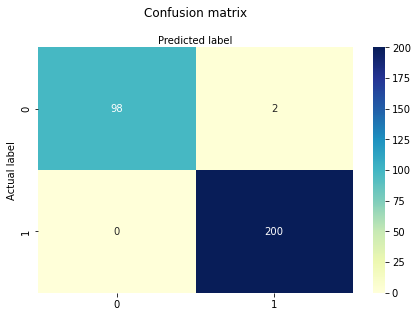

In [15]:
# Verrification de la classification: Matrice de confusion:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


<div>
<h3 style="margin: auto; padding: 10px;color: pink">
            4.3 - Test accuracy
    </div>

In [16]:
# Voir : https://www.lovelyanalytics.com/2020/05/26/accuracy-recall-precision/
test_accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:  %.3f %%" % test_accuracy)
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=6))


Accuracy:  99.333 %
Precision: 0.9900990099009901
Recall: 1.0
              precision    recall  f1-score   support

       False   1.000000  0.980000  0.989899       100
        True   0.990099  1.000000  0.995025       200

    accuracy                       0.993333       300
   macro avg   0.995050  0.990000  0.992462       300
weighted avg   0.993399  0.993333  0.993316       300



---
<div>
    <div style="background-color: pink;" id="partie5">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Partie 5 - Courbe ROC
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### La courbe roc permet de déterminer et de comparer les performances diagnostiques de plusieurs tests à l'aide de l'évaluation des aires sous la courbe. 

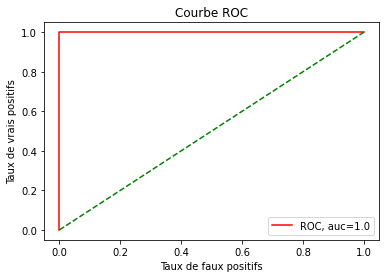

In [17]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color="red", label="ROC, auc="+str(auc))
plt.plot([0, 1], [0, 1], color="green", linestyle='--')
plt.legend(loc=4)
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.show()


---
<div>
    <div style="background-color: pink;" id="Sauvegarde">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Sauvegarde du modèle Régression Logistique sur le disque
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

In [18]:
# https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
import pickle
# Enregistre le modèle
filename = "finalized_model.pickle"

# dumps() - Cette fonction est appelée pour sérialiser une hiérarchie d'objets.
pickle.dump(logreg, open(filename, "wb"))


---
<div>
    <div style="background-color: pink;" id="Conclusion">
        <h2 style="margin: auto; padding: 20px; color:#fff;margin-left: 4.5em; text-indent: -4.5em">
            Conclusion
        </h2>
        <font size="-0"><a href="#partie0">  🔝  </a></font>
    </div>
</div>

### Nous avons pu voir deux types de regression logistique la première avec la librairie Statsmodels et la seconde avec la librairie Sklearn.
### Le test d'accuracy nous indiquant une performance de 99,33% pour notre modèle avec la librairie Sklearn, nous choisirons donc d'effectuer la regression logistique sur notre jeux de données test avec Sklearn.
### Le modèle de régression logistique est sauvegardé sur le disque avec la fonction "dumps()" du module "pickle" afin de réaliser l'étape finale qui est le test de l'algorithme.
### La courbe de ROC ayant un marqueur à 1 soit 100% des individus on pu être séparés et classifiés.